# Social Media Ads Dataset

## Import

In [46]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [47]:
df =pd.read_csv("C:\\Users\\ALICOM4\\OneDrive\\Desktop\\Learnings\\Excel Data\\Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,NaN,0
1,15810944.0,Male,NaN,20000.0,0
2,15668575.0,NaN,26.0,43000.0,0
3,15603246.0,Female,NaN,57000.0,0
4,15804002.0,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863.0,Female,46.0,41000.0,1
396,15706071.0,Male,51.0,23000.0,1
397,15654296.0,Female,50.0,20000.0,1
398,15755018.0,Male,36.0,33000.0,0


In [48]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,NaN,0
1,15810944.0,Male,NaN,20000.0,0
2,15668575.0,NaN,26.0,43000.0,0
3,15603246.0,Female,NaN,57000.0,0
4,15804002.0,Male,19.0,76000.0,0


In [49]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863.0,Female,46.0,41000.0,1
396,15706071.0,Male,51.0,23000.0,1
397,15654296.0,Female,50.0,20000.0,1
398,15755018.0,Male,36.0,33000.0,0
399,15594041.0,Female,49.0,36000.0,1


## EDA

In [50]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19.0,NaN,0
1,15810944.0,Male,NaN,20000.0,0
2,15668575.0,NaN,26.0,43000.0,0
3,15603246.0,Female,NaN,57000.0,0
4,15804002.0,Male,19.0,76000.0,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          397 non-null    float64
 1   Gender           396 non-null    object 
 2   Age              394 non-null    float64
 3   EstimatedSalary  396 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 15.8+ KB


In [52]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,3.970000e+02,394.000000,396.000000,400.000000
mean,1.569172e+07,37.667513,69987.373737,0.357500
std,7.164492e+04,10.516852,34089.789736,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562722e+07,29.250000,43000.000000,0.000000
50%,1.569429e+07,37.000000,70000.000000,0.000000
75%,1.575045e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Explore Gender Column

In [53]:
df['Gender'].value_counts()

Gender
Female    203
Male      193
Name: count, dtype: int64

In [54]:
df.groupby("Age")['Gender'].value_counts()

Age   Gender
18.0  Female    3
      Male      1
19.0  Male      5
      Female    2
20.0  Female    4
               ..
58.0  Male      1
59.0  Female    5
      Male      2
60.0  Male      5
      Female    2
Name: count, Length: 83, dtype: int64

In [55]:
fig = px.bar(x=df['Gender'])
fig.show()

<Axes: xlabel='Gender', ylabel='count'>

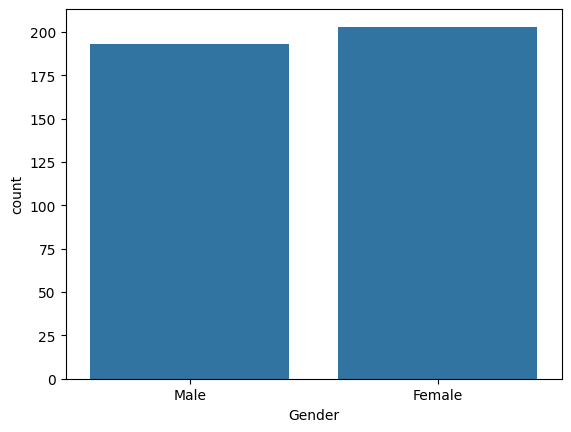

In [56]:
sns.countplot(x= df["Gender"])

### Explore Age Column

In [57]:
df['Age'].nunique()

43

In [58]:
df.groupby('Gender')['Age'].value_counts() 

Gender  Age 
Female  35.0    13
        37.0    10
        41.0     9
        26.0     8
        27.0     7
                ..
Male    52.0     1
        53.0     1
        54.0     1
        55.0     1
        58.0     1
Name: count, Length: 83, dtype: int64

In [59]:
fig = px.box(df['Age'])
fig.show()

### Explore EstimatedSalary Column

In [60]:
df['EstimatedSalary'].nunique()

117

In [61]:
df.groupby('Gender')['EstimatedSalary'].value_counts() 

Gender  EstimatedSalary
Female  72000.0            7
        50000.0            5
        71000.0            5
        80000.0            5
        82000.0            5
                          ..
Male    141000.0           1
        143000.0           1
        148000.0           1
        149000.0           1
        150000.0           1
Name: count, Length: 191, dtype: int64

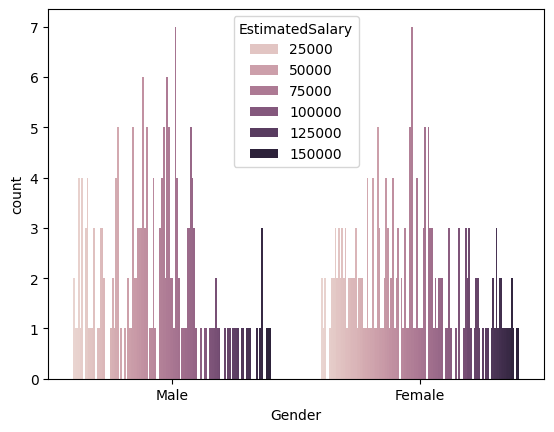

In [62]:
sns.countplot(x='Gender', hue='EstimatedSalary', data=df)
plt.show()

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



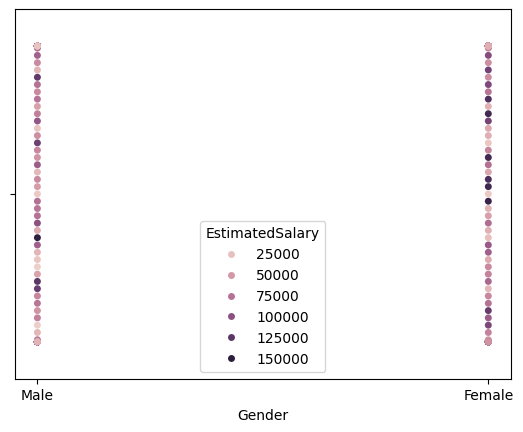

In [63]:
sns.swarmplot(x='Gender', hue='EstimatedSalary', data=df)
plt.show()

### Explore Purchased Column

In [64]:
df['Purchased'].nunique()

2

In [65]:
df.groupby('Gender')['Purchased'].value_counts()

Gender  Purchased
Female  0            126
        1             77
Male    0            127
        1             66
Name: count, dtype: int64

In [66]:
fig = px.bar(df, x='Purchased', y='Age')
fig.show()


In [67]:
mean_age = df['Age'].mean()
print(mean_age)


mean_a = df['EstimatedSalary'].mean()
print(mean_a)

37.66751269035533
69987.37373737374


## Dealing with Missing Values

In [68]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [69]:
if 'User ID' in df.columns:
    df.drop(['User ID'], axis=1, inplace=True)

In [70]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [71]:
df.isnull().sum() / len(df) * 100

Gender             1.0
Age                1.5
EstimatedSalary    1.0
Purchased          0.0
dtype: float64

In [72]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,NaN,0
1,Male,NaN,20000.0,0
2,NaN,26.0,43000.0,0
3,Female,NaN,57000.0,0
4,Male,19.0,76000.0,0


In [73]:
df['Age'] = df['Age'].fillna(value=37)


In [74]:
df['EstimatedSalary'] = df['EstimatedSalary'].fillna(value=69987)

In [75]:
df["Gender"] = df.Gender.fillna(value =df['Gender'].mode()[0])

In [76]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,69987.0,0
1,Male,37.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,37.0,57000.0,0
4,Male,19.0,76000.0,0


In [77]:
# Create the DataFrame
data = {'Gender': ['Male', 'Female', 'Male', 'Female']}
p1= pd.DataFrame(data)

# Replace 'male' with 1 and 'female' with 2 in the 'Sex' column
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

# Print the DataFrame to check
print(df)



     Gender   Age  EstimatedSalary  Purchased
0         0  19.0          69987.0          0
1         0  37.0          20000.0          0
2         1  26.0          43000.0          0
3         1  37.0          57000.0          0
4         0  19.0          76000.0          0
..      ...   ...              ...        ...
395       1  46.0          41000.0          1
396       0  51.0          23000.0          1
397       1  50.0          20000.0          1
398       0  36.0          33000.0          0
399       1  49.0          36000.0          1

[400 rows x 4 columns]


C:\Users\ALICOM4\AppData\Local\Temp\ipykernel_15368\1964731000.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [78]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19.0,69987.0,0
1,0,37.0,20000.0,0
2,1,26.0,43000.0,0
3,1,37.0,57000.0,0
4,0,19.0,76000.0,0


In [79]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,1,46.0,41000.0,1
396,0,51.0,23000.0,1
397,1,50.0,20000.0,1
398,0,36.0,33000.0,0
399,1,49.0,36000.0,1


<Axes: xlabel='Age', ylabel='Count'>

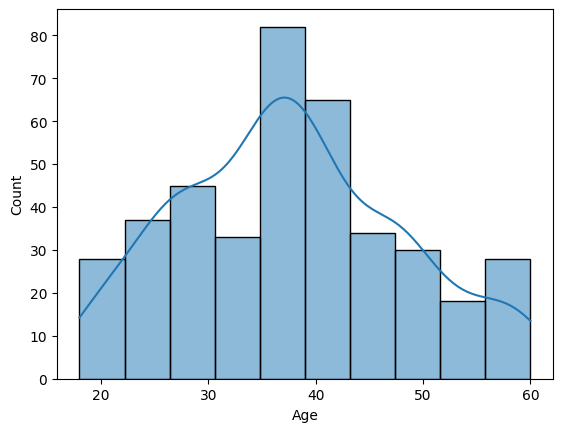

In [80]:
sns.histplot(df['Age'], kde=1)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

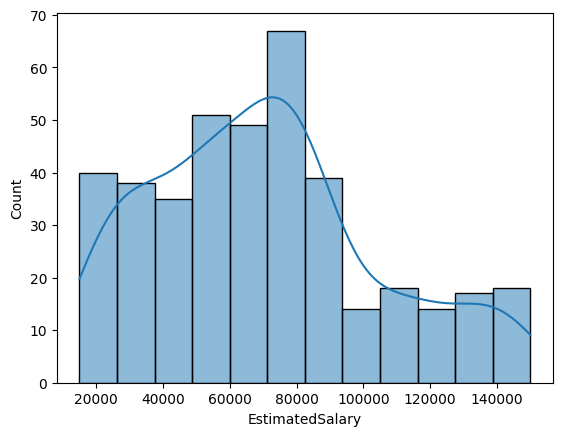

In [81]:
sns.histplot(df['EstimatedSalary'], kde=1)

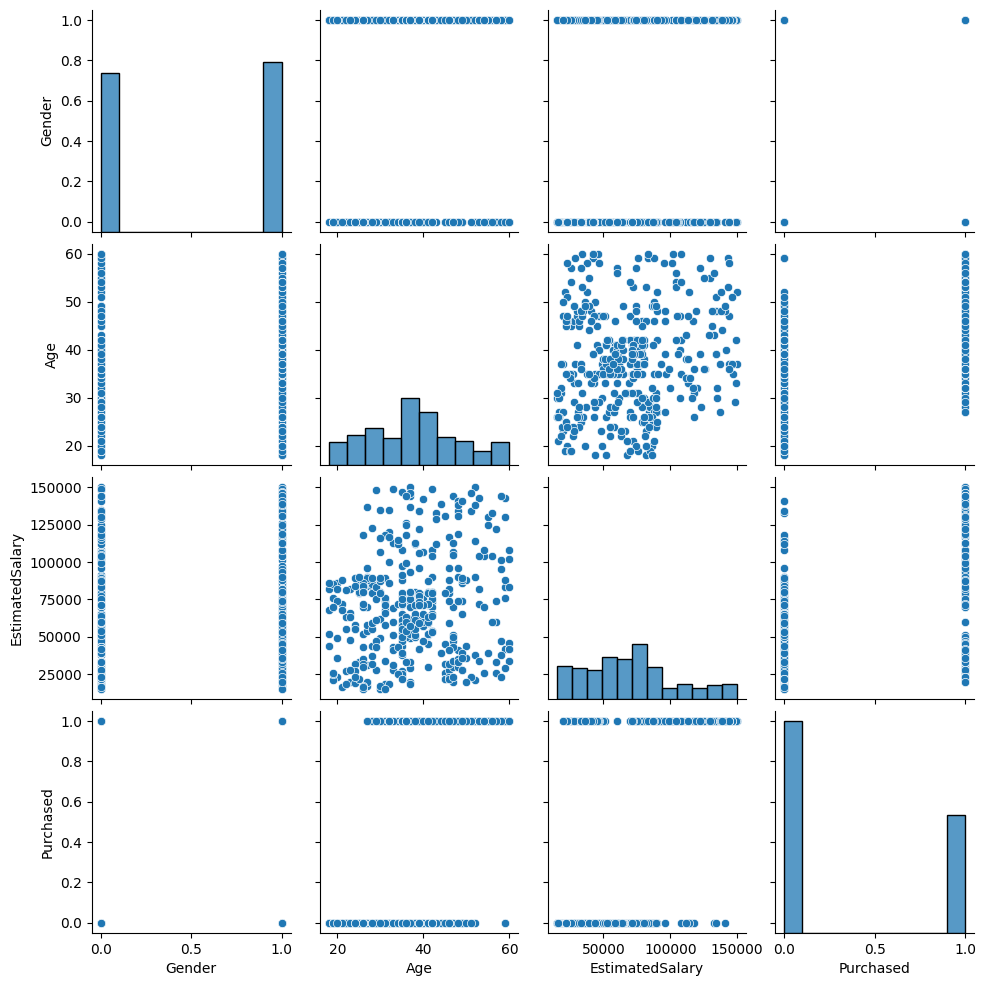

In [82]:
sns.pairplot(df)

## Transforming Data

ShapiroResult(statistic=0.9785551960307574, pvalue=1.1951749827092987e-05)

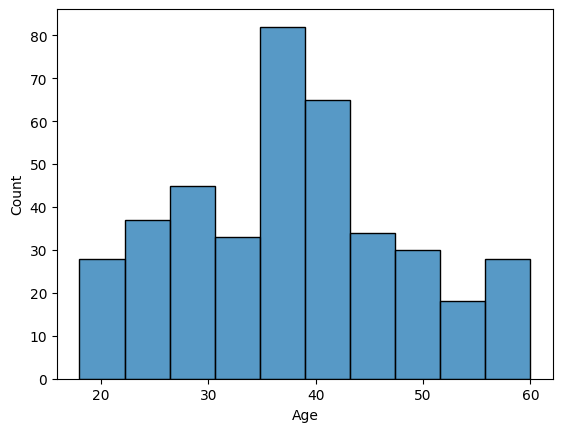

In [83]:
sns.histplot(df['Age'])
stats.shapiro(df['Age'])

ShapiroResult(statistic=0.9606608490545163, pvalue=7.197643682590792e-09)

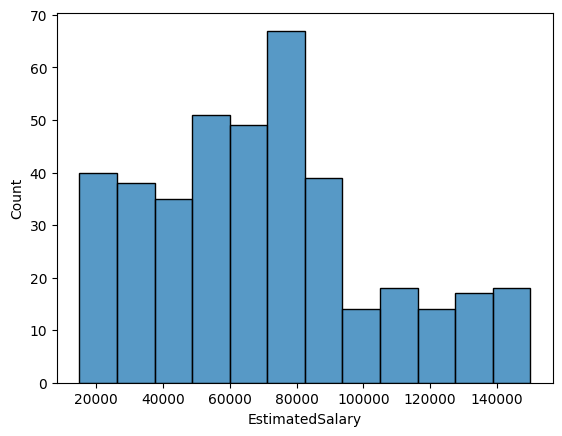

In [84]:
sns.histplot(df['EstimatedSalary'])
stats.shapiro(df['EstimatedSalary'])

In [85]:
x= df[['Age']]
y= df[['EstimatedSalary']]

In [86]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
qt_normal = QuantileTransformer(output_distribution='normal')

# Apply Box-Cox transformation
df['Box-Cox_X'] = pt_boxcox.fit_transform(x.values.reshape(-1, 1) + 1)
df['Box-Cox_Y'] = pt_boxcox.fit_transform(y.values.reshape(-1, 1) + 1)

# Apply Yeo-Johnson transformation
df['Yeo-Johnson_X'] = pt_yeojohnson.fit_transform(x.values.reshape(-1, 1))
df['Yeo-Johnson_Y'] = pt_yeojohnson.fit_transform(y.values.reshape(-1, 1))

# Apply Quantile transformation
df['Quantile_X'] = qt_normal.fit_transform(x.values.reshape(-1, 1))
df['Quantile_Y'] = qt_normal.fit_transform(y.values.reshape(-1, 1))

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning:

n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.

c:\Users\ALICOM4\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning:

n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.



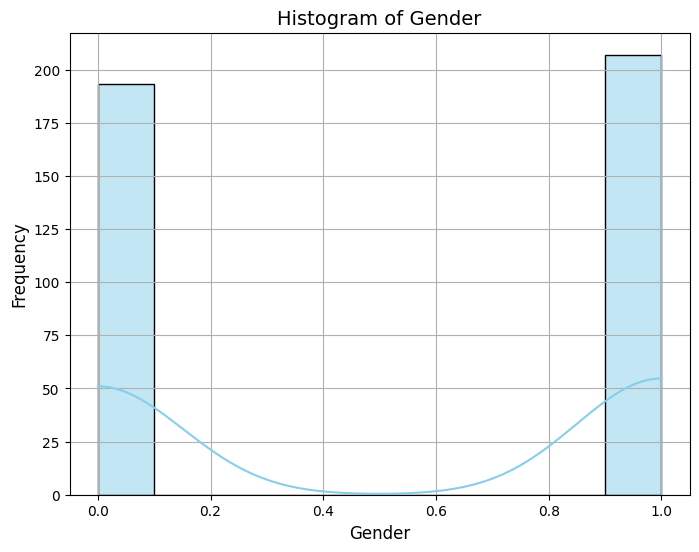

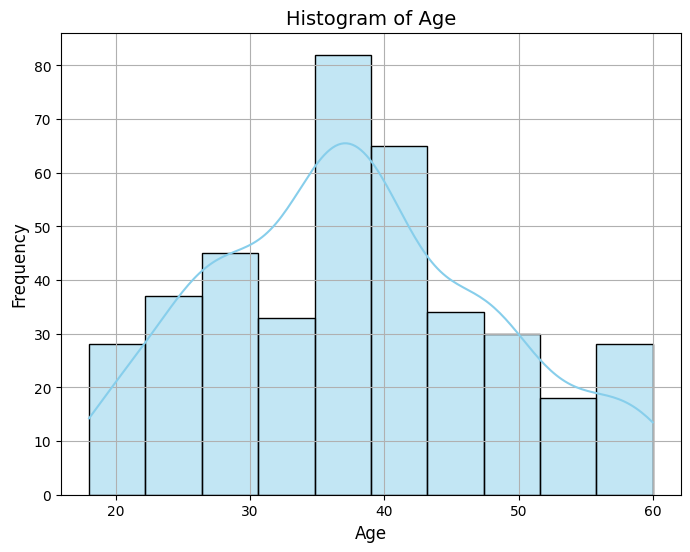

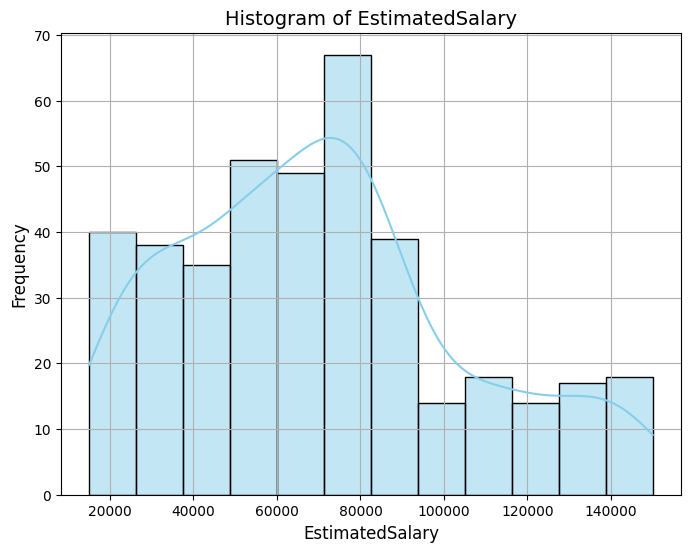

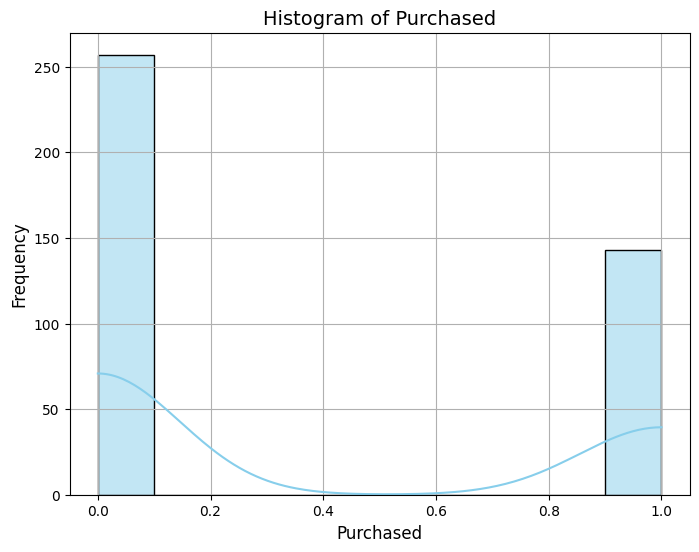

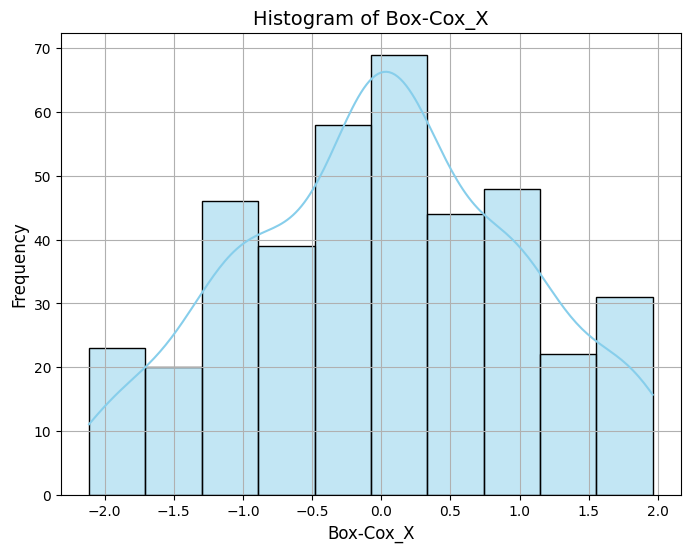

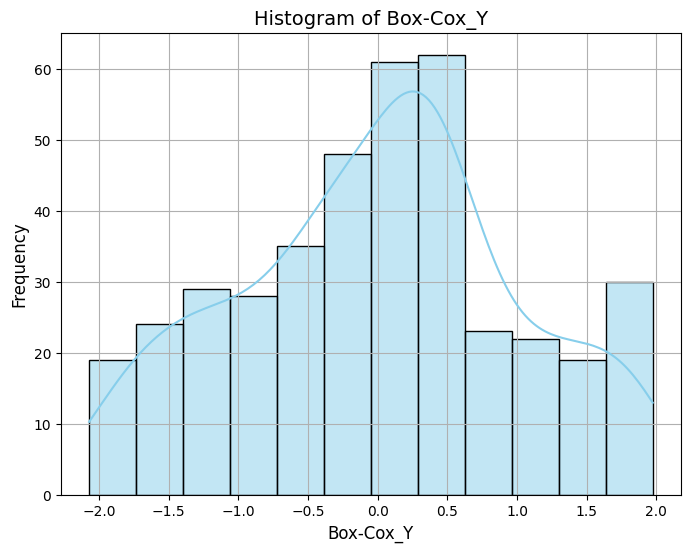

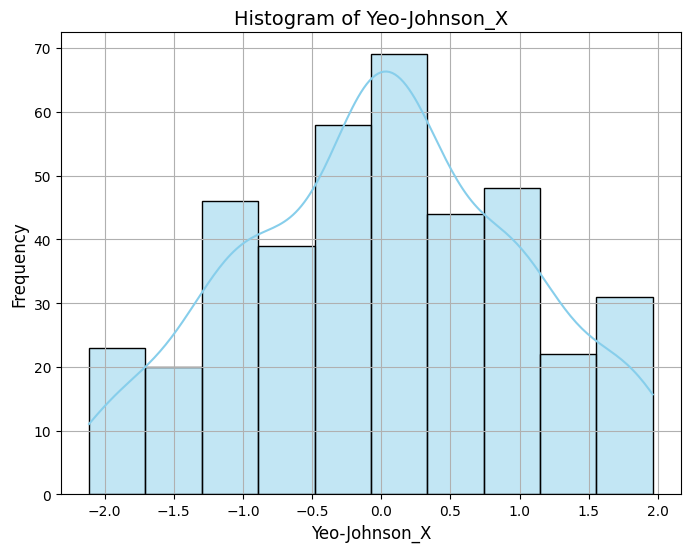

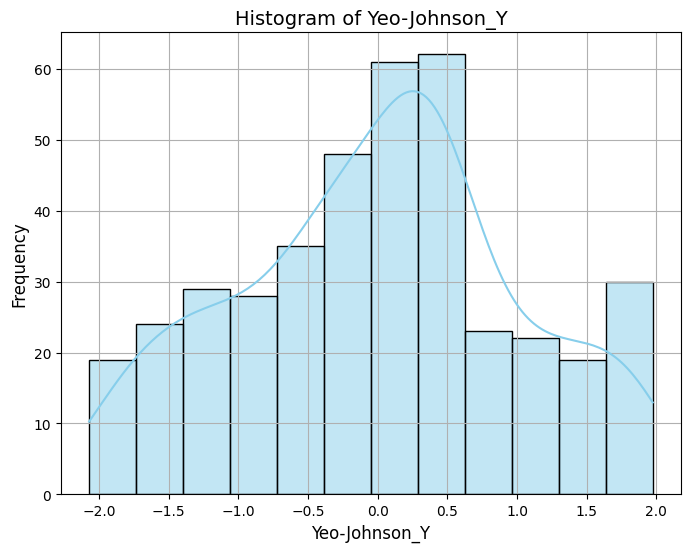

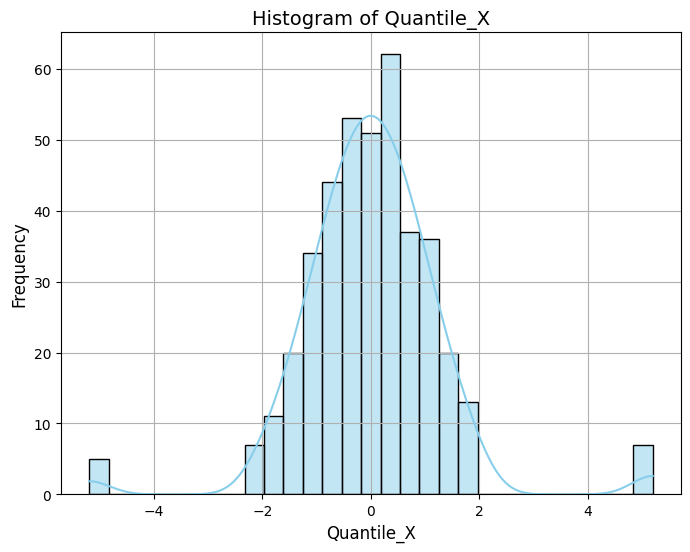

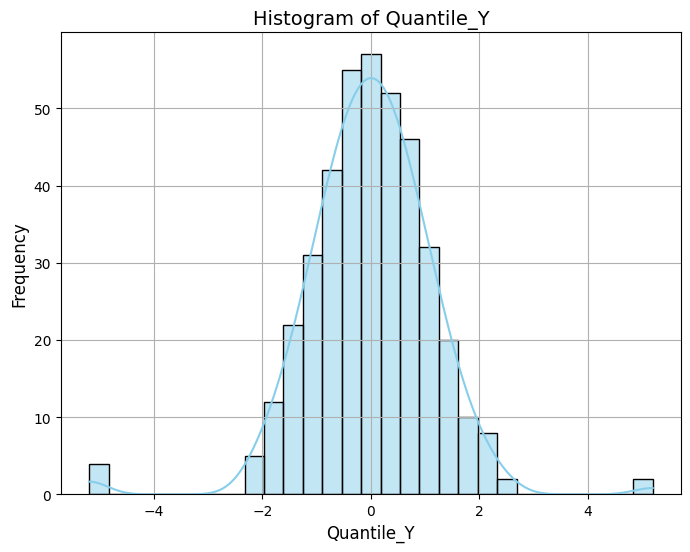

In [87]:
import seaborn as sns

for column in df.columns:
    # Create a new figure for each column
    plt.figure(figsize=(8, 6))
    
    # Draw histogram plot with KDE for the column using seaborn's distplot
    sns.histplot(df[column], kde=True, color='skyblue', edgecolor='black')
    
    # Set title and labels
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show grid
    plt.grid(True)
    
    # Show plot
    plt.show()

In [88]:
"""#LOG TRANSFORM
df["Age"] = np.log(df["Age"])
df["EstimatedSalary"] = np.log(df["EstimatedSalary"])


#p1.head()
print(stats.shapiro(df["Age"]))
print(stats.shapiro(df["EstimatedSalary"]))

sns.histplot(df["Age"], kde=1)
sns.histplot(df["EstimatedSalary"], kde=1)"""

'#LOG TRANSFORM\ndf["Age"] = np.log(df["Age"])\ndf["EstimatedSalary"] = np.log(df["EstimatedSalary"])\n\n\n#p1.head()\nprint(stats.shapiro(df["Age"]))\nprint(stats.shapiro(df["EstimatedSalary"]))\n\nsns.histplot(df["Age"], kde=1)\nsns.histplot(df["EstimatedSalary"], kde=1)'

In [89]:
df.to_csv("Wrangled Data of Social Media Ads.csv") 